Text(0, 0.5, 'sigmoid值')

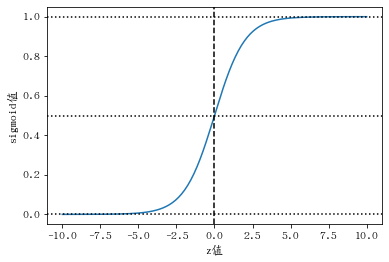

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "AR PL UKai CN"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 12

# 定义sigmoid 函数:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
plt.plot(z, sigmoid(z))
plt.axvline(x=0, ls='--', c='k')
plt.axhline(ls=':', c='k')
plt.axhline(y=0.5, ls=':', c='k')
plt.axhline(y=1, ls=':', c='k')
plt.xlabel("z值")
plt.ylabel("sigmoid值")

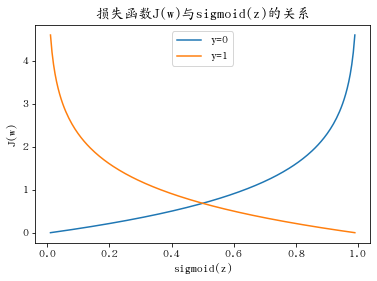

In [4]:
s = np.linspace(0.01, 0.99, 200)
for y in [0, 1]:
    loss = -y * np.log(s) - (1 - y) * np.log(1 - s)
    plt.plot(s, loss, label=f"y={y}")
plt.legend()
plt.xlabel("sigmoid(z)")
plt.ylabel("J(w)")
plt.title("损失函数J(w)与sigmoid(z)的关系")
plt.show()

In [8]:
# 逻辑回归实现二分类
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")

iris = load_iris()
X, y = iris.data, iris.target
X = X[y != 0, 2:]
y = y[y != 0]
# 此时，y的标签为1与2，我们这里将其改为0与1。（仅仅是为了习惯而已）
y[y == 1] = 0
y[y == 2] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print("权重:", lr.coef_)
print("偏置:", lr.intercept_)
print("真实值:", y_test)
print("预测值:", y_hat)

权重: [[2.54536368 2.15257324]]
偏置: [-16.08741502]
真实值: [1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]
预测值: [1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1]


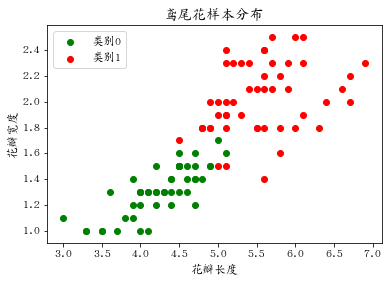

In [10]:
# 结果可视化
c1 = X[y == 0]
c2 = X[y == 1]
plt.scatter(x=c1[:, 0], y=c1[:, 1], c='g', label="类别0")
plt.scatter(x=c2[:, 0], y=c2[:, 1], c='r', label="类别1")
plt.xlabel("花瓣长度")
plt.ylabel("花瓣宽度")
plt.title("鸢尾花样本分布")
plt.legend()

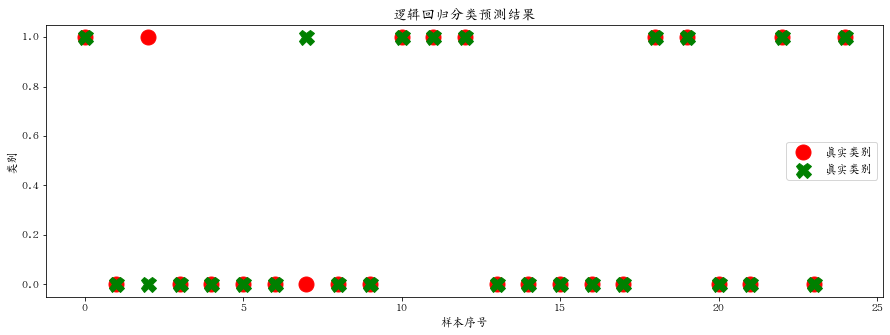

In [13]:
# 绘制在测试集中，样本的真实类别与预测类别
plt.figure(figsize=(15, 5))
plt.plot(y_test, marker="o", ls="", ms=15, c="r", label="真实类别")
plt.plot(y_hat, marker="X", ls="", ms=15, c="g", label="真实类别")
plt.legend()
plt.xlabel("样本序号")
plt.ylabel("类别")
plt.title("逻辑回归分类预测结果")
plt.show()

array([[0.46933862, 0.53066138],
       [0.98282882, 0.01717118],
       [0.72589695, 0.27410305],
       [0.91245661, 0.08754339],
       [0.80288412, 0.19711588]])

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1])

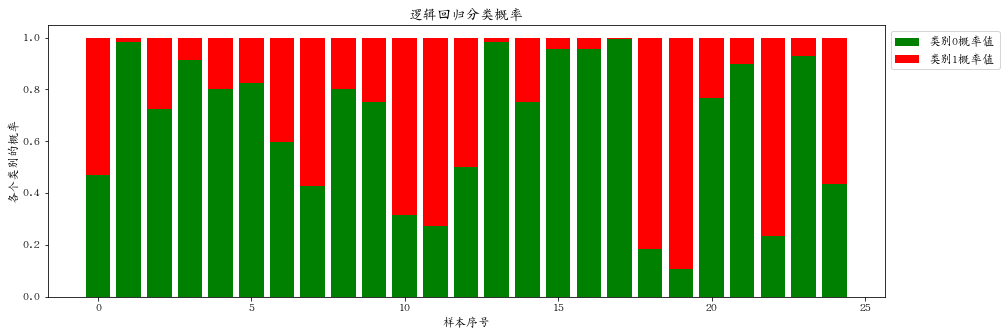

In [24]:
# 计算概率值
# 获取预测的概率值，包括属于每个类别的概率
probability = lr.predict_proba(X_test)
display(probability[:5])
display(np.argmax(probability, axis=1))
# 产生序号，用于可视化的横坐标
index = np.arange(len(X_test))
pro_0 = probability[:, 0]
pro_1 = probability[:, 1]
tick_label = np.where(y_test == y_hat, "0", "X")
plt.figure(figsize=(15, 5))
# 绘制折叠图
plt.bar(index, height=pro_0, color="g", label="类别0概率值")
plt.bar(index, height=pro_1, color="r", bottom=pro_0, label="类别1概率值")
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.xlabel("样本序号")
plt.ylabel("各个类别的概率")
plt.title("逻辑回归分类概率")
plt.show()

In [27]:
from matplotlib.colors import ListedColormap
# 定义函数，用于绘制决策边界
def plot_decision_boundary(model, X, y):
    color = ["r", "g", "b"]
    marker = ["o", "v", "x"]
    class_label = np.unique(y)
    cmap = ListedColormap(color[: len(class_label)])
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    x1 = np.arange(x1_min - 1, x1_max + 1, 0.02)
    x2 = np.arange(x2_min - 1, x2_max + 1, 0.02)
    X1, X2 = np.meshgrid(x1, x2)
    Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    # 绘制使用颜色填充的等高线
    plt.contourf(X1, X2, Z, cmap=cmap, alpha=0.5)
    for i, class_ in enumerate(class_label):
        plt.scatter(
            x=X[y == class_, 0], 
            y=X[y == class_, 1],
            c=cmap.colors[i],
            label=class_,
            marker=marker[i]
        )
    plt.legend()
    plt.show()

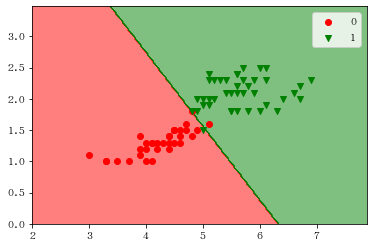

In [28]:
plot_decision_boundary(lr, X_train, y_train)

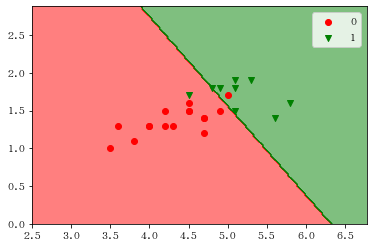

In [29]:
# 测试集展示
plot_decision_boundary(lr, X_test, y_test)

In [31]:
# 逻辑回归算法也可以实现多分类任务
iris = load_iris()
X, y = iris.data, iris.target
X = X[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print("分类正确率:", np.sum(y_test == y_hat) / len(y_test))

分类正确率: 0.9736842105263158


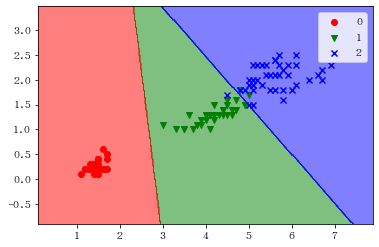

In [32]:
plot_decision_boundary(lr, X_train, y_train)

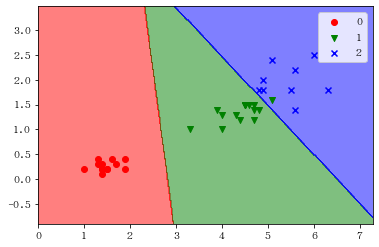

In [33]:
plot_decision_boundary(lr, X_test, y_test)